In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [34]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, :]
print(diabetes_X.shape, type(diabetes_X))


(442, 1, 10) <class 'numpy.ndarray'>


In [37]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20, 0, :]
diabetes_X_test = diabetes_X[-20:, 0, :]
print(diabetes_X_train.shape, diabetes_X_train[0])
# diabetes_X_train = diabetes_X_train[:, 0, :]
# print(diabetes_X_train.shape, diabetes_X_train[0])


# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print(diabetes_y_test)

(422, 10) [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
[ 233.   91.  111.  152.  120.   67.  310.   94.  183.   66.  173.   72.
   49.   64.   48.  178.  104.  132.  220.   57.]


In [38]:
X_train = pd.DataFrame(diabetes_X_train)
Y_train = pd.DataFrame(diabetes_y_train)

X_test = pd.DataFrame(diabetes_X_test)
Y_test = pd.DataFrame(diabetes_y_test)

In [40]:
X_test.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362
1,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641
2,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775
3,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783
4,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907


In [41]:
Y_test.head()

,0
0,233.0
1,91.0
2,111.0
3,152.0
4,120.0


In [72]:
def train_and_measure_lr(X_train, Y_train, X_test, Y_test):
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    print(X_train.shape)
    
    Y_train_predictions = regressor.predict(X_train)
    train_error = mean_squared_error(Y_train, Y_train_predictions)
    
    Y_test_predictions = regressor.predict(X_test)
    test_error = mean_squared_error(Y_test, Y_test_predictions)
    
    print("train_error: %lf,   test_error: %lf" % (train_error, test_error))
    return train_error, test_error, regressor

In [73]:
_, _, model = train_and_measure_lr(X_train, Y_train, X_test, Y_test)

(422, 10)
train_error: 2901.557648,   test_error: 2004.567603


In [55]:
model.intercept_

array([ 152.76430692])

In [93]:
X_train.iloc[:, 2].shape

(422,)

# Variation with no. of training examples

In [85]:
train_errors = []
test_errors = []

for i in range(100, 422, 4):
    tr_er, ts_er, _ = train_and_measure_lr(X_train[:i], Y_train[:i], X_test, Y_test)
    train_errors.append(tr_er)
    test_errors.append(ts_er)

# print(train_errors)
# print(test_errors)

(100, 10)
train_error: 2451.142509,   test_error: 1777.983501
(104, 10)
train_error: 2650.180008,   test_error: 1656.060783
(108, 10)
train_error: 2630.335896,   test_error: 1656.820924
(112, 10)
train_error: 2631.896781,   test_error: 1672.435834
(116, 10)
train_error: 2759.270708,   test_error: 1685.082938
(120, 10)
train_error: 2761.844175,   test_error: 1753.437163
(124, 10)
train_error: 2726.102105,   test_error: 1716.059182
(128, 10)
train_error: 2679.674144,   test_error: 1719.883538
(132, 10)
train_error: 2677.776847,   test_error: 1730.295902
(136, 10)
train_error: 2618.789958,   test_error: 1751.350139
(140, 10)
train_error: 2627.149300,   test_error: 1768.487684
(144, 10)
train_error: 2664.112543,   test_error: 1789.894220
(148, 10)
train_error: 2672.054483,   test_error: 1803.921132
(152, 10)
train_error: 2693.443252,   test_error: 1827.987205
(156, 10)
train_error: 2721.493185,   test_error: 1852.505247
(160, 10)
train_error: 2773.734531,   test_error: 1821.907247
(164, 10

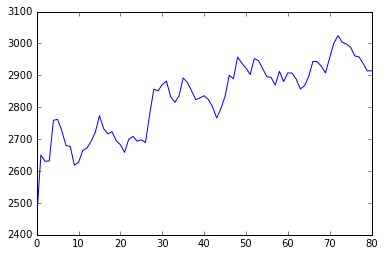

In [75]:
plt.plot(train_errors)

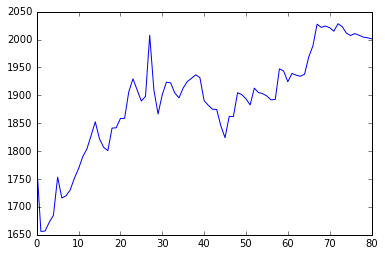

In [76]:
plt.plot(test_errors)

In [86]:
all_tr_er, all_ts_er, model = train_and_measure_lr(X_train, Y_train, X_test, Y_test)

(422, 10)
train_error: 2901.557648,   test_error: 2004.567603


In [89]:
y_tr_pred = model.predict(X_train)
y_ts_pred = model.predict(X_test)

In [97]:
# plt.scatter(X_test.iloc[:, 2], Y_test,  color='black')
# plt.plot(X_test.iloc[:, 2], y_ts_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

# Correlation

In [99]:
import seaborn as sns

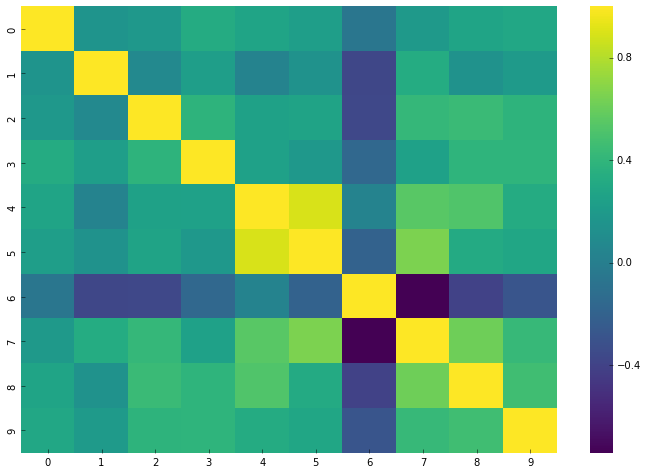

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), cmap='viridis')

In [110]:
# print(X_train.columns)
new_X_train = X_train.drop(4, axis=1)
new_X_train.shape
# print(X_train.iloc[0])
# print(new_x_train.iloc[0])
new_X_test = X_test.drop(4, axis=1)
print(new_X_test.shape)

(20, 9)


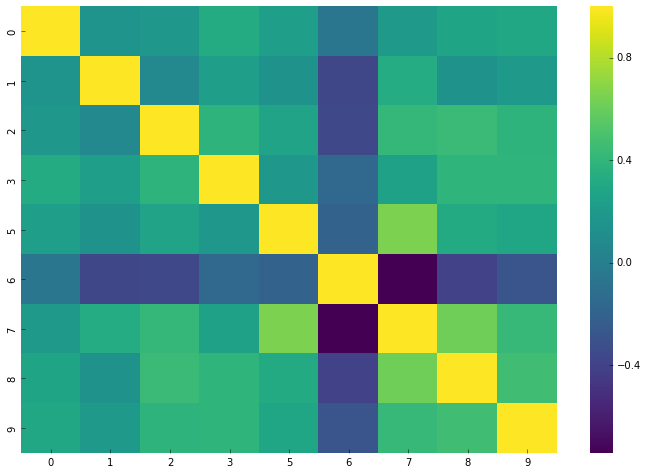

In [111]:
plt.figure(figsize=(12,8))
sns.heatmap(new_X_train.corr(), cmap='viridis')

In [112]:
all_tr_er, all_ts_er, model = train_and_measure_lr(new_X_train, Y_train, new_X_test, Y_test)

(422, 9)
train_error: 2927.580627,   test_error: 1985.622436


(20, 8)


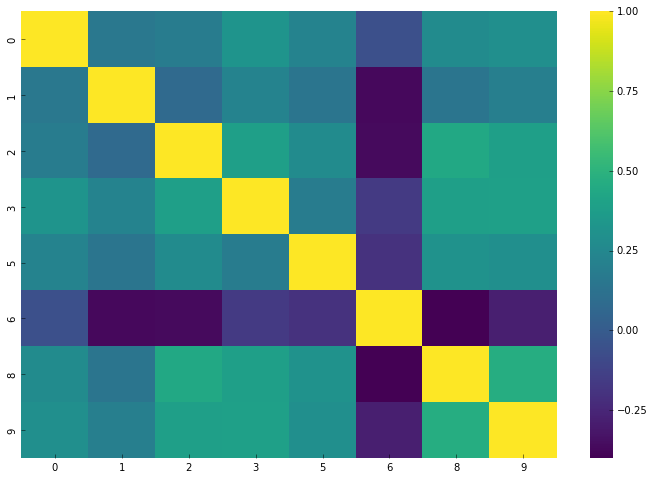

In [114]:
# print(X_train.columns)
new_new_X_train = new_X_train.drop(7, axis=1)
new_new_X_train.shape
# print(X_train.iloc[0])
# print(new_x_train.iloc[0])
new_new_X_test = new_X_test.drop(7, axis=1)
print(new_new_X_test.shape)

plt.figure(figsize=(12,8))
sns.heatmap(new_new_X_train.corr(), cmap='viridis')

In [115]:
all_tr_er, all_ts_er, model = train_and_measure_lr(new_new_X_train, Y_train, new_new_X_test, Y_test)

(422, 8)
train_error: 2928.994025,   test_error: 1988.228723


(422, 10)
['y', 5, 6, 7, 8, 9]


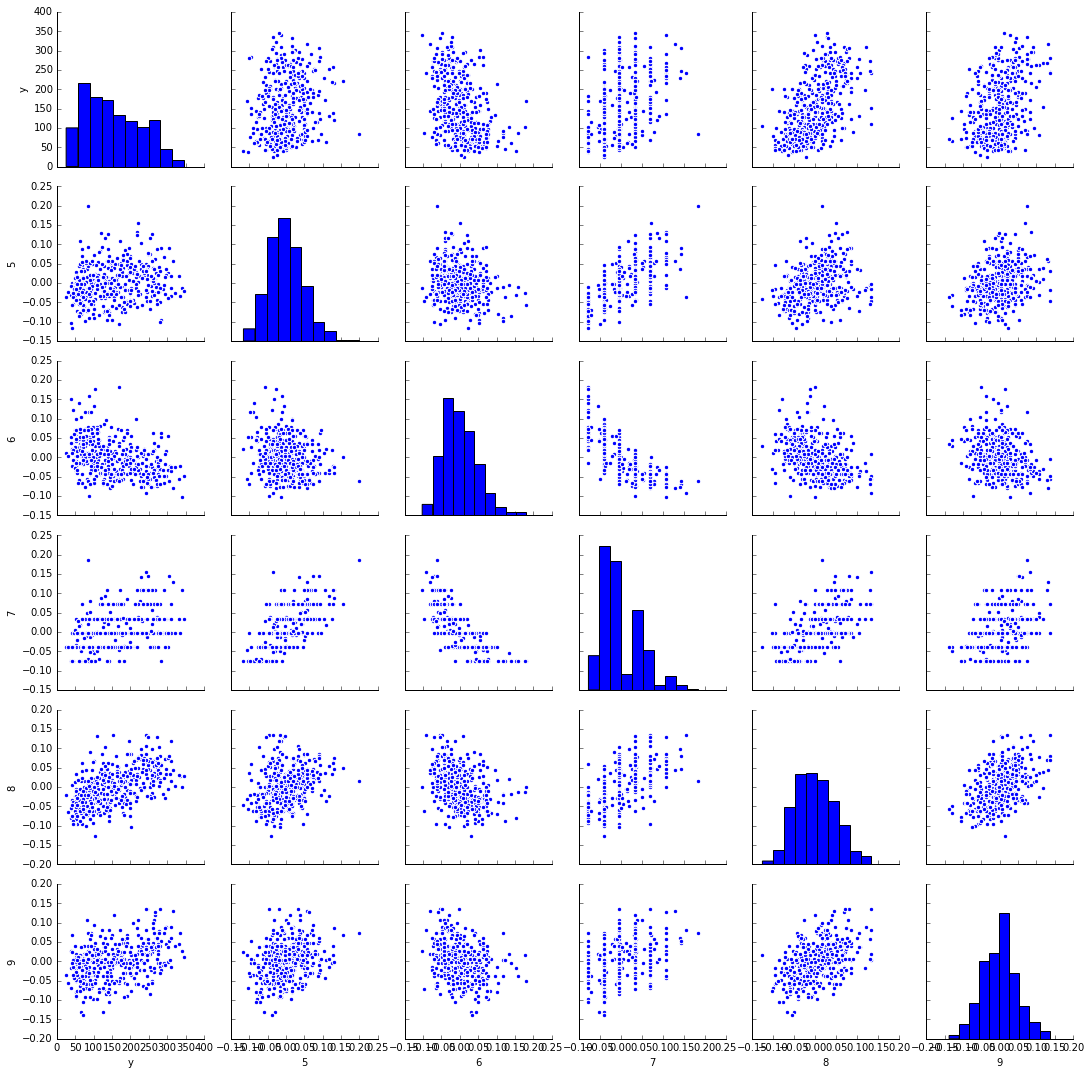

In [121]:
# Visualizing relations between all major variables
new_X_train['y'] = Y_train
print(new_X_train.shape)
cols = ['y'] + [i for i in range(10) if i>4]
print(cols)
sns.pairplot(new_X_train[cols])

(422, 10)
(422, 8)
(20, 10)
(20, 8)


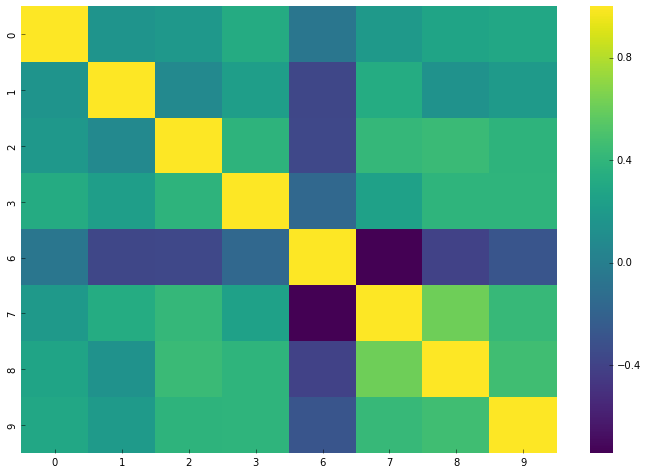

In [127]:
# print(X_train.columns)
print(X_train.shape)
new_new_X_train = X_train.drop(4, axis=1).drop(5, axis=1)
print(new_new_X_train.shape)
# print(X_train.iloc[0])
# print(new_x_train.iloc[0])

print(X_test.shape)
new_new_X_test = X_test.drop(4, axis=1).drop(5, axis=1)
print(new_new_X_test.shape)

plt.figure(figsize=(12,8))
sns.heatmap(new_new_X_train.corr(), cmap='viridis')

In [128]:
all_tr_er, all_ts_er, model = train_and_measure_lr(new_new_X_train, Y_train, new_new_X_test, Y_test)

(422, 8)
train_error: 2943.247532,   test_error: 2007.820656
